[View in Colaboratory](https://colab.research.google.com/github/youny-nak/hello-world/blob/master/2018dlb_lec02_testMNIST.ipynb)

In [59]:
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import numpy as np

np.random.seed(34)

def sigmoid(x):
#     return 1 / (1 + np.exp(- x))
    return np.tanh(x * 0.5) * 0.5 + 0.5 # numpy組み込みのtanhを利用 (expのoverflowを防ぐ)

# ORのデータセット
x_train_or = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
t_train_or = np.array([[1], [1], [0], [1]])
x_valid_or, t_valid_or = x_train_or, t_train_or
x_test_or, t_test_or = x_train_or, t_train_or

# 重み (入力の次元数: 2, 出力の次元数: 1)
W_or = np.random.uniform(low=-0.08, high=0.08, size=(2, 1)).astype('float32')
b_or = np.zeros(shape=(1,)).astype('float32')

# logの中身が0になるのを防ぐ
def np_log(x):
    return np.log(np.clip(a=x, a_min=1e-10, a_max=x))
  
def train_or(x, t, eps=1.0):
    """
    :param x: np.ndarray, 入力データ, shape=(batch_size, 入力の次元数)
    :param t: np.ndarray, 教師ラベル, shape=(batch_size, 出力の次元数)
    :param eps: float, 学習率
    """
    global W_or, b_or
    
    batch_size = x.shape[0]
    
    # 順伝播
    y = sigmoid(np.matmul(x, W_or) + b_or) # shape: (batch_size, 出力の次元数)
    
    # 逆伝播
    cost = (- t * np_log(y) - (1 - t) * np_log(1 - y)).mean()
    delta = y - t # shape: (batch_size, 出力の次元数)
    
    # パラメータの更新
    dW = np.matmul(x.T, delta) / batch_size # shape: (入力の次元数, 出力の次元数)
    db = np.matmul(np.ones(shape=(batch_size,)), delta) / batch_size # shape: (出力の次元数,)
    W_or -= eps * dW
    b_or -= eps * db

    return cost

def valid_or(x, t):
    y = sigmoid(np.matmul(x, W_or) + b_or)
    cost = (- t * np_log(y) - (1 - t) * np_log(1 - y)).mean()
    return cost, y
  
for epoch in range(1000):
    # オンライン学習
    x_train_or, t_train_or = shuffle(x_train_or, t_train_or)
    for x, t in zip(x_train_or, t_train_or):
        cost = train_or(x[None, :], t[None, :])
    cost, y_pred = valid_or(x_valid_or, t_valid_or)

print(y_pred)

[[0.9979988 ]
 [0.99799904]
 [0.00500219]
 [0.99999998]]


In [0]:
mnist = datasets.fetch_mldata('MNIST original')


In [66]:
x_mnist = mnist.data.astype(np.float32) / 255　

t_mnist = np.eye(N=10)[mnist.target.astype(np.int32)] #one-hot形式にする

#検証データとテストデータの分割
x_train_mnist, x_test_mnist, t_train_mnist, t_test_mnist = train_test_split(x_mnist, t_mnist, test_size=10000)
x_train_mnist, x_valid_mnist, t_train_mnist, t_valid_mnist = train_test_split(x_train_mnist, t_train_mnist, test_size=10000)
# 0から255までの値なので、255で割って正規化する

SyntaxError: ignored

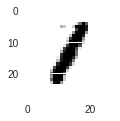

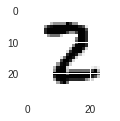

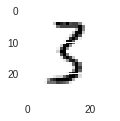

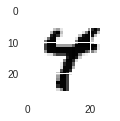

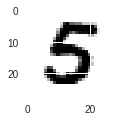

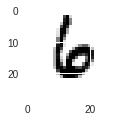

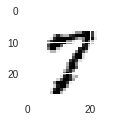

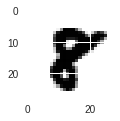

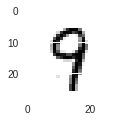

In [48]:
#mnistデータを10個だけ可視化してみる
import matplotlib.pyplot as plt
for i in range(1,10):
    plt.subplot(330+i)
    plt.imshow(X[30+i*6500].reshape(28,28),cmap='gray_r')
    plt.show()

In [0]:
def softmax(x):
    x -= x.max(axis=1, keepdims=True) # expのunderflow & overflowを防ぐ
    x_exp = np.exp(x)
    return x_exp / np.sum(x_exp, axis=1, keepdims=True)

def train_mnist(x, t, eps=1.0):
    """
    :param x: np.ndarray, 入力データ, shape=(batch_size, 入力の次元数)
    :param t: np.ndarray, 教師ラベル, shape=(batch_size, 出力の次元数)
    :param eps: float, 学習率
    """
    global W_mnist, b_mnist
    
    batch_size = x.shape[0]
    
    # 順伝播
    y = softmax(np.matmul(x, W_mnist) + b_mnist) # shape: (batch_size, 出力の次元数)
    
    # 逆伝播
    cost = (- t * np_log(y)).sum(axis=1).mean()　　#多クラス交差エントロピーを損失関数とする
    delta = y - t # shape: (batch_size, 出力の次元数)
    
    # パラメータの更新
    dW = np.matmul(x.T, delta) / batch_size # shape: (入力の次元数, 出力の次元数)
    db = np.matmul(np.ones(shape=(batch_size,)), delta) / batch_size # shape: (出力の次元数,)
    W_mnist -= eps * dW
    b_mnist -= eps * db

    return cost

def valid_mnist(x, t):
    y = softmax(np.matmul(x, W_mnist) + b_mnist)
    cost = (- t * np_log(y)).sum(axis=1).mean()
    
    return cost, y

In [44]:
for epoch in range(3):
    # オンライン学習
    x_train_mnist, t_train_mnist = shuffle(x_train_mnist, t_train_mnist)
    for x, t in zip(x_train_mnist, t_train_mnist):
        cost = train_mnist(x[None, :], t[None, :])
    cost, y_pred = valid_mnist(x_valid_mnist, t_valid_mnist)
    print('EPOCH: {}, Valid Cost: {:.3f}, Valid Accuracy: {:.3f}'.format(
        epoch + 1,
        cost,
        accuracy_score(t_valid_mnist.argmax(axis=1), y_pred.argmax(axis=1))
    ))

EPOCH: 1, Valid Cost: 3.223, Valid Accuracy: 0.843
EPOCH: 2, Valid Cost: 2.521, Valid Accuracy: 0.876
EPOCH: 3, Valid Cost: 2.235, Valid Accuracy: 0.890


In [49]:
# 重み (入力の次元数: 784, 出力の次元数: 10)
W_mnist = np.random.uniform(low=-0.08, high=0.08, size=(784, 10)).astype('float32')
b_mnist = np.zeros(shape=(10,)).astype('float32')

for epoch in range(30):
    # 機械学習
    #xとyの順番をシャッフルする
    #x1_train, y1_train = shuffle(x_train, y_train)
    
    #任意の100個を選んで更新していく作戦
    train_size=x_train_mnist.shape[0]
    b_size=100
    batch_mask=np.random.choice(train_size,b_size)
    x1_train=x_train_mnist[batch_mask]
    t1_train=t_train_mnist[batch_mask]
    
    
    for x, t in zip(x1_train, t1_train):
        cost = train_mnist(x[None, :], t[None, :])
        cost, y_pred = valid_mnist(x_valid_mnist, t_valid_mnist)
    print('EPOCH: {}, Valid Cost: {:.3f}, Valid Accuracy: {:.3f}'.format(
        epoch + 1,
        cost,
        accuracy_score(t_valid_mnist.argmax(axis=1), y_pred.argmax(axis=1))
    ))

EPOCH: 1, Valid Cost: 10.082, Valid Accuracy: 0.480
EPOCH: 2, Valid Cost: 7.224, Valid Accuracy: 0.607
EPOCH: 3, Valid Cost: 5.782, Valid Accuracy: 0.679
EPOCH: 4, Valid Cost: 5.605, Valid Accuracy: 0.704
EPOCH: 5, Valid Cost: 5.651, Valid Accuracy: 0.695
EPOCH: 6, Valid Cost: 6.037, Valid Accuracy: 0.674
EPOCH: 7, Valid Cost: 4.068, Valid Accuracy: 0.776
EPOCH: 8, Valid Cost: 5.940, Valid Accuracy: 0.689
EPOCH: 9, Valid Cost: 4.326, Valid Accuracy: 0.767
EPOCH: 10, Valid Cost: 4.017, Valid Accuracy: 0.789
EPOCH: 11, Valid Cost: 3.414, Valid Accuracy: 0.814
EPOCH: 12, Valid Cost: 3.529, Valid Accuracy: 0.808
EPOCH: 13, Valid Cost: 3.826, Valid Accuracy: 0.793
EPOCH: 14, Valid Cost: 4.191, Valid Accuracy: 0.777
EPOCH: 15, Valid Cost: 5.115, Valid Accuracy: 0.733
EPOCH: 16, Valid Cost: 3.172, Valid Accuracy: 0.828
EPOCH: 17, Valid Cost: 4.371, Valid Accuracy: 0.767
EPOCH: 18, Valid Cost: 4.480, Valid Accuracy: 0.768
EPOCH: 19, Valid Cost: 4.382, Valid Accuracy: 0.777
EPOCH: 20, Valid Cos